In [1]:
# IMPORT STATEMENTS
import sys
sys.path.append("/booleanfs2/sahoo/Hegemon/")
sys.path = ["/booleanfs2/sahoo/BoNE/"] + sys.path

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

try:
    reload  # Python 2.7
except NameError:
    try:
        from importlib import reload  # Python 3.4+
    except ImportError:
        from imp import reload  # Python 3.0 - 3.3
        
import SMaRT.MacUtils as mut

In [2]:
import pandas as pd
import numpy as np
import bone
reload(bone)
import Datasets
reload(Datasets)
import Datasets_icam
reload(Datasets_icam)
hu = bone.hu
re = bone.re

In [3]:
import Datasets_icam 
reload(Datasets_icam)
import Datasets_icam as ds

# Figure 4A

In [5]:
from matplotlib import pyplot as plt
acolor = ["#00CC00", "#D8A03D","#EC008C",
          'cyan', "#B741DC", "#808285",
          'blue', 'black', 'green', 'red',
          'orange', 'brown', 'pink', 'purple']
def plotViolinBar(ana, desc=None):
    global acolor
    fig = plt.figure(figsize=(5,7), dpi=100)
    plt.subplots_adjust(hspace=0, wspace=0)

    ax1 = plt.subplot2grid((10, 1), (0, 0))
    ax2 = plt.subplot2grid((10, 1), (2, 0), rowspan=5)
    params = {'spaceAnn': len(ana.order)/len(ana.atypes), 'tAnn': 1, 'widthAnn':1,
              'genes': [], 'ax': ax1, 'acolor': acolor}
    ax = ana.printTitleBar(params)
    res = ana.getROCAUC()
    ax.text(len(ana.cval[0]), 4, res)
#     res = ana.getMetrics(ana.cval[0])
#     ax.text(len(ana.cval[0]), 4, ",".join(res))
    strname = str(ana.source +" " + ana.name)
    if desc is not None:
        ax.text(-1, 2, strname, horizontalalignment='right',
                    verticalalignment='center')
    params = {'spaceAnn': len(ana.order)/len(ana.atypes), 'tAnn': 1, 'widthAnn':1,
            'genes': [], 'ax': ax2, 'acolor': acolor, 'vert': 0}
    ax.text(1, 0.1, strname, horizontalalignment='left', verticalalignment='center', transform=ax.transAxes)
    ax = ana.printViolin(None, params)
    
    return fig

def plotDensityBar(ana, desc=None):
    fig = plt.figure(figsize=(10,10), dpi=100)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    ax1 = plt.subplot2grid((4, 1), (0, 0))
    ax2 = plt.subplot2grid((4, 1), (1, 0), rowspan=4)
    params = {'spaceAnn': len(ana.order)/len(ana.atypes), 'tAnn': 1, 'widthAnn':1,
              'genes': [], 'ax': ax1, 'acolor': acolor}
    ax = ana.printTitleBar(params)
    res = ana.getMetrics(ana.cval[0])
    ax.text(len(ana.cval[0]), 4, ",".join(res))
    if desc is not None:
        ax.text(-1, 2, desc, horizontalalignment='right',
                    verticalalignment='center')
    ax = ana.densityPlot(ax2, acolor)
    return fig

def processData(ana, l1, wt1, desc=None, violin=1):
    ana.orderData(l1, wt1)
    if (violin == 1):
        return plotViolinBar(ana, desc)
    return plotDensityBar(ana, desc)

Vancamelbeke 2017 IBD (n = 194)
GSE75214 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PLP16
93 [82, 11] GSE75214 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PLP16 PLP16
[6, 12]
Pekow 2013 UC CRC (n = 20)
GSE37283 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PLP59
9 [4, 5] GSE37283 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PLP59 PLP59
[14, 28]
Tang 2017 IBD (n = 68)
GSE97012 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PLP78
68 [41, 27] GSE97012 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PLP78 PLP78
[34, 25]
Denson 2018 Peds UC (n = 226)
GSE109142 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PLP86
226 [206, 20] GSE109142 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PLP86 PLP86
[6, 9]
Planell 2013 UC (n = 43)
GSE38713 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PLP88
35 [22, 13] GSE38713 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PLP88 PLP88
[14, 28]
Sarvestani 2018 uc (

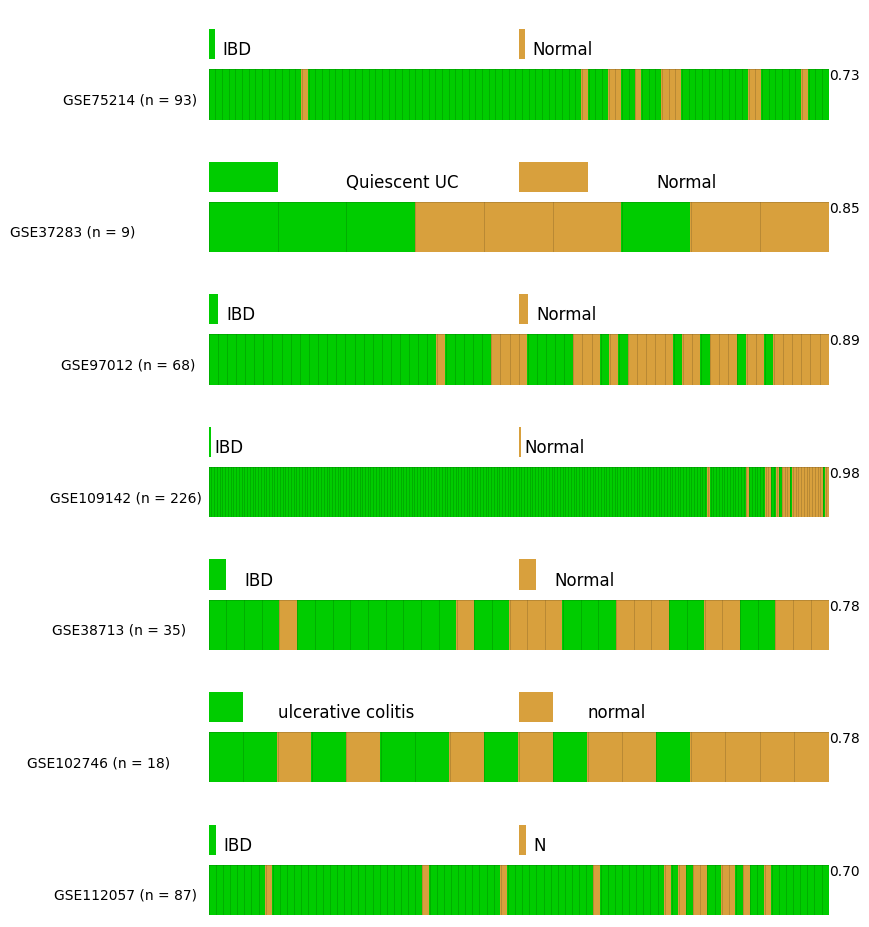

In [15]:
def plotValidationMac(ana, l1, wt1, ax):
    ana.orderData(l1, wt1)
    params = {'spaceAnn': len(ana.order)/len(ana.atypes), 
             'tAnn': 1, 'widthAnn':1, 'acolor': acolor,
             'w': 1, 'h': 0.8, 'ax': ax}
    ax = ana.printTitleBar(params)
    res = ana.getROCAUC()
#     print(desc, res)
    desc = ana.name
    ax.text(len(ana.cval[0]), 4, res)
    sNum = str(" (n = " + str(len(ana.order)) + ") ")
#     strname = str(ana.source+sNum + ana.name)
    strname = str(ana.source+sNum)
    if desc is not None:
        ax.text(-1, 2, strname, horizontalalignment='right',
                    verticalalignment='center')
    ax.text(1, 0.1, " " , horizontalalignment='left', verticalalignment='center', transform=ax.transAxes)


def comparativeAnalysisIBD_1():
    fig = mut.plt.figure(figsize=(8,12), dpi=100)
    n1 = 7
    axlist = []
    for i in range(n1):
        ax = mut.plt.subplot2grid((n1, 1), (i, 0))
        axlist.extend([ax])

    wt1, l1 = ds.getICAM()
    ana = bone.IBDAnalysis()
    ana.getVancamelbekeIBD(2)
    plotValidationMac(ana, l1, wt1, axlist[0])
    ana.getPekowNew(2) 
    plotValidationMac(ana, l1, wt1, axlist[1])
    ana.getTang2017New(2)
    plotValidationMac(ana, l1, wt1, axlist[2])
    ana.getDenson2018(2)
    plotValidationMac(ana, l1, wt1, axlist[3])    
    ana.getPlanell2013(2)
    plotValidationMac(ana, l1, wt1, axlist[4])
    ana.getSarvestani2018(2)
    plotValidationMac(ana, l1, wt1, axlist[5])
    ana.geMo2018bloodIBD(2)
    plotValidationMac(ana, l1, wt1, axlist[6])    
#     fig.savefig("pdf_res/Fig4a-b-HD.pdf", dpi=100, transparent=True,bbox_inches = 'tight')
        
comparativeAnalysisIBD_1()

# Figure 4B

Wu 2007 IBD (n = 36)
GSE6731 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PLP12
6 [2, 4] GSE6731 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PLP12 PLP12
[4, 13]
Galamb 2008 Inf Ad CRC (n = 53)
GSE4183 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PLP83
23 [15, 8] GSE4183 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PLP83 PLP83
[14, 28]
Breynaert 2013 dss (n = 30)
GSE42768 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PLP38
10 [5, 5] GSE42768 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PLP38 PLP38
[6, 9]
Lyons 2018 Mm T Cell IBD (n = 10)
GSE87317 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PLP89
10 [6, 4] GSE87317 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PLP89 PLP89
[16, 13]


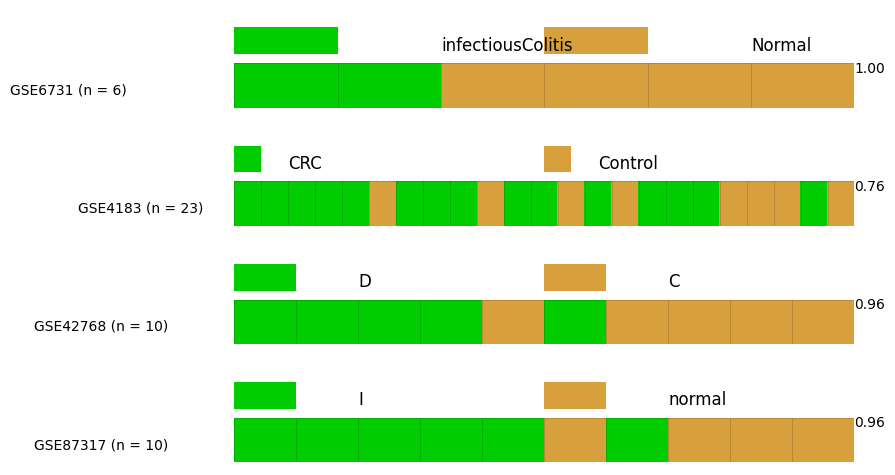

In [13]:
def plotValidationMac(ana, l1, wt1, ax):
    ana.orderData(l1, wt1)
    params = {'spaceAnn': len(ana.order)/len(ana.atypes), 
             'tAnn': 1, 'widthAnn':1, 'acolor': acolor,
             'w': 1, 'h': 0.8, 'ax': ax}
    ax = ana.printTitleBar(params)
    res = ana.getROCAUC()
#     print(desc, res)
    desc = ana.name
    ax.text(len(ana.cval[0]), 4, res)
    sNum = str(" (n = " + str(len(ana.order)) + ") ")
#     strname = str(ana.source+sNum + ana.name)
    strname = str(ana.source+sNum)
    if desc is not None:
        ax.text(-1, 2, strname, horizontalalignment='right',
                    verticalalignment='center')
    ax.text(1, 0.1, " " , horizontalalignment='left', verticalalignment='center', transform=ax.transAxes)


def comparativeAnalysisIBD_2():
    fig = mut.plt.figure(figsize=(8,6), dpi=100)
    n1 = 4
    axlist = []
    for i in range(n1):
        ax = mut.plt.subplot2grid((n1, 1), (i, 0))
        axlist.extend([ax])

    wt1, l1 = ds.getICAM()
    ana = bone.IBDAnalysis()
    ana.getWu2007New(2) # INF vs Normal
    plotValidationMac(ana, l1, wt1, axlist[0])
    ana.getGalamb2008(4)
    plotValidationMac(ana, l1, wt1, axlist[1])
    wt1, l1 = ds.getICAM()
    l1 = mut.getGroupsMm(l1)
    ana.getBreynaert2013(3)
    plotValidationMac(ana, l1, wt1, axlist[2])
    wt1, l1 = ds.getICAM()
    l1 = mut.getGroupsMm(l1) 
    ana.getLyons2018(2)
    plotValidationMac(ana, l1, wt1, axlist[3])
#     fig.savefig("pdf_res/Fig4a-b-HD.pdf", dpi=100, transparent=True,bbox_inches = 'tight')
        
comparativeAnalysisIBD_2()